Step 1: Data Loading and Exploration

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from scipy import stats
import numpy as np

# Load the CSV file
file_path = '/content/sample_data/weatherHistory.csv'
data = pd.read_csv(file_path)

# Data Exploration
print("Data Information:")
data.info()

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB

Summary Statistics:
       Temperature (C)  Appare

Step 2: Data Cleaning

In [13]:
# Convert 'Formatted Date' to datetime format
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Drop columns that are not useful
data_cleaned = data.drop(['Loud Cover', 'Daily Summary'], axis=1)

# Handle missing data
data_cleaned = data_cleaned.dropna()

# Encode categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['Precip Type', 'Summary'], drop_first=True)


Step 3: Exploratory Data Analysis (EDA)

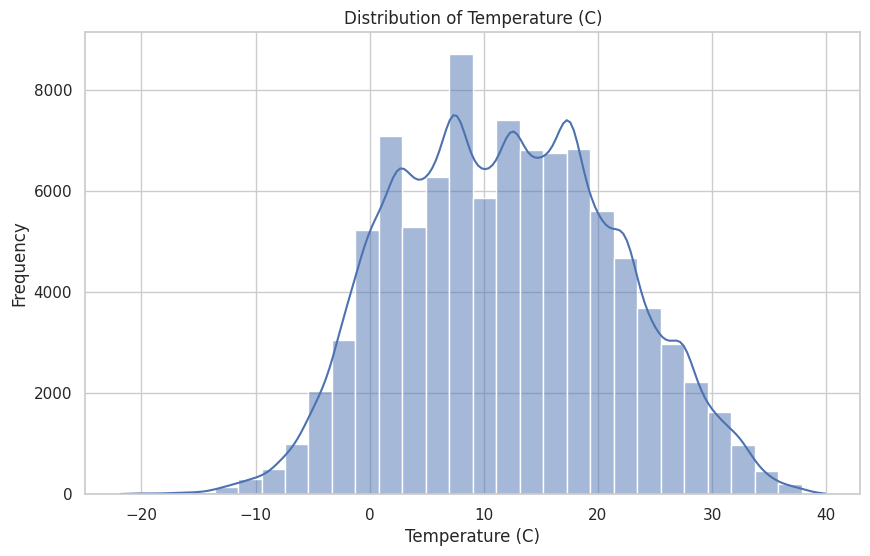

In [14]:
# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Temperature (C)'], bins=30, kde=True)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()


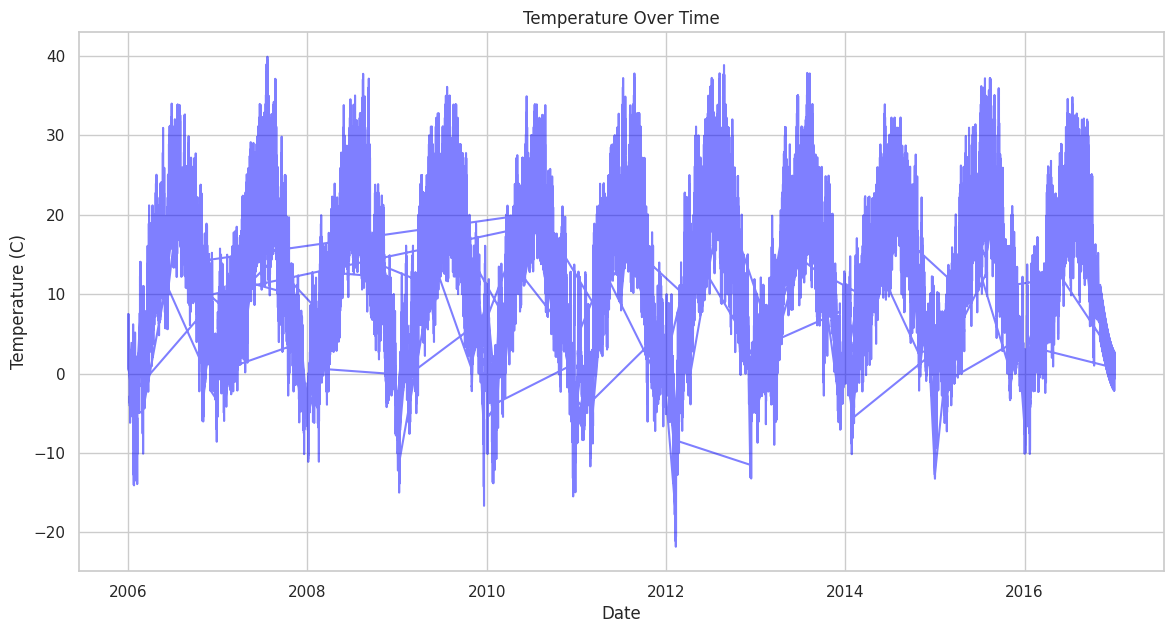

In [15]:

# Temperature Over Time
plt.figure(figsize=(14, 7))
plt.plot(data_cleaned['Formatted Date'], data_cleaned['Temperature (C)'], color='blue', alpha=0.5)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()



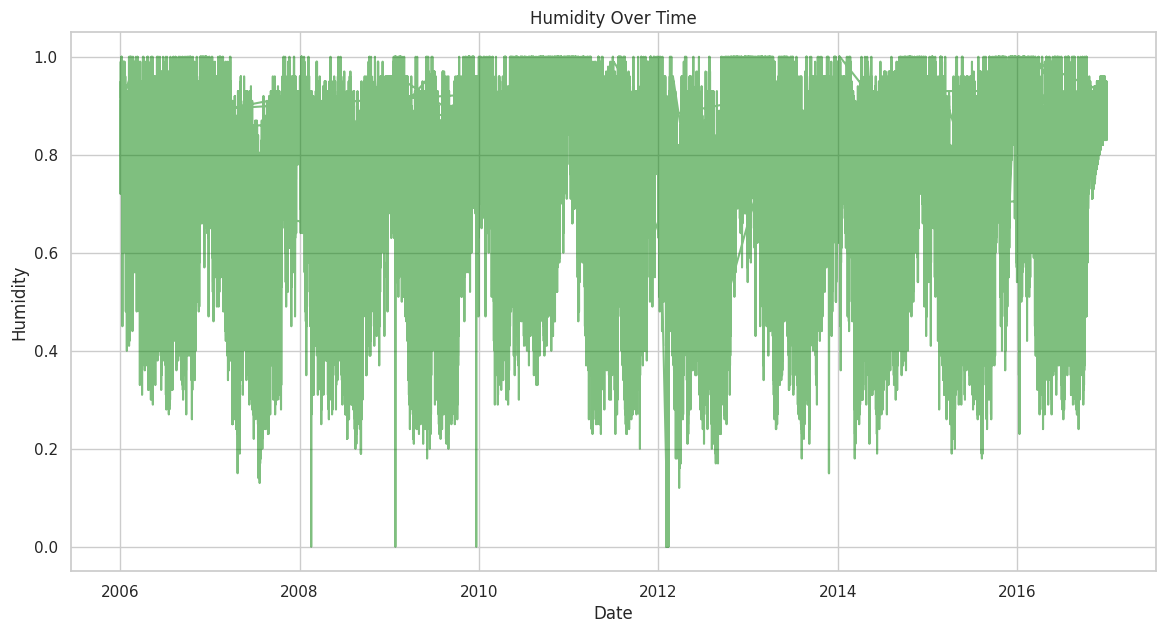

In [16]:

# Humidity Over Time
plt.figure(figsize=(14, 7))
plt.plot(data_cleaned['Formatted Date'], data_cleaned['Humidity'], color='green', alpha=0.5)
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

Step 4: Correlation Analysis

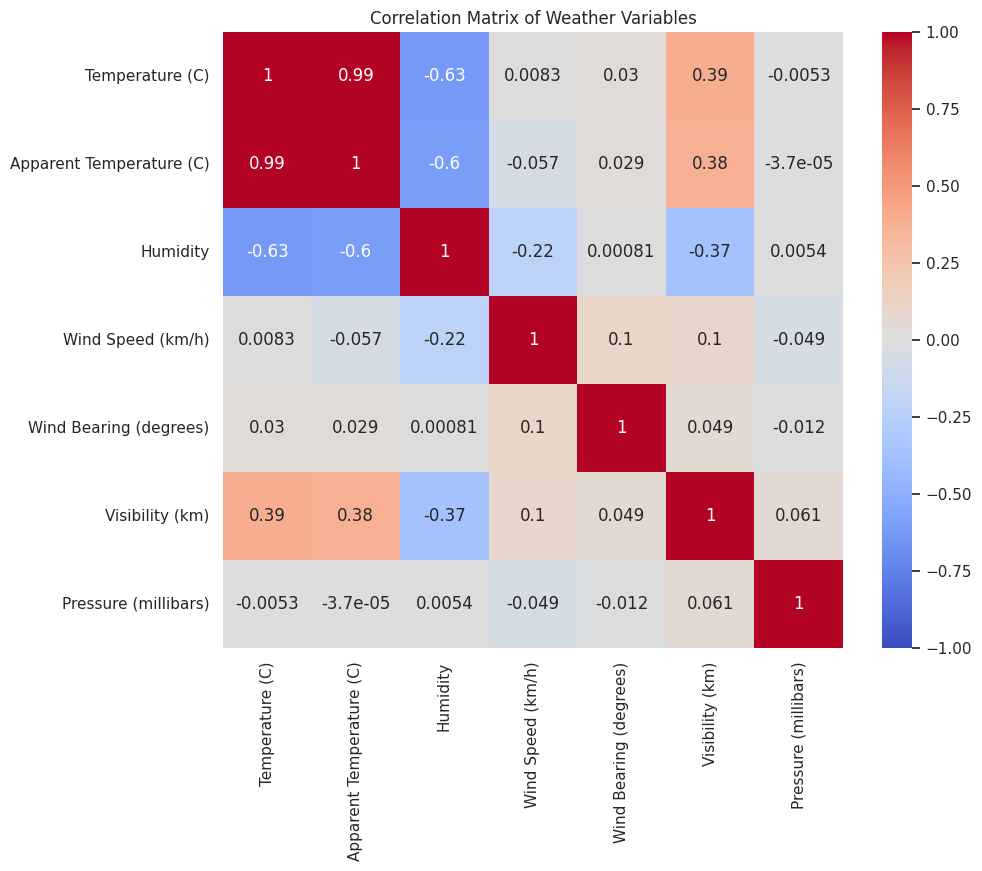

In [17]:
# Drop non-numeric columns for correlation analysis
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()

# Correlation Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Variables')
plt.show()


Step 5: Simple Linear Regression using SciPy (Humidity as Feature)

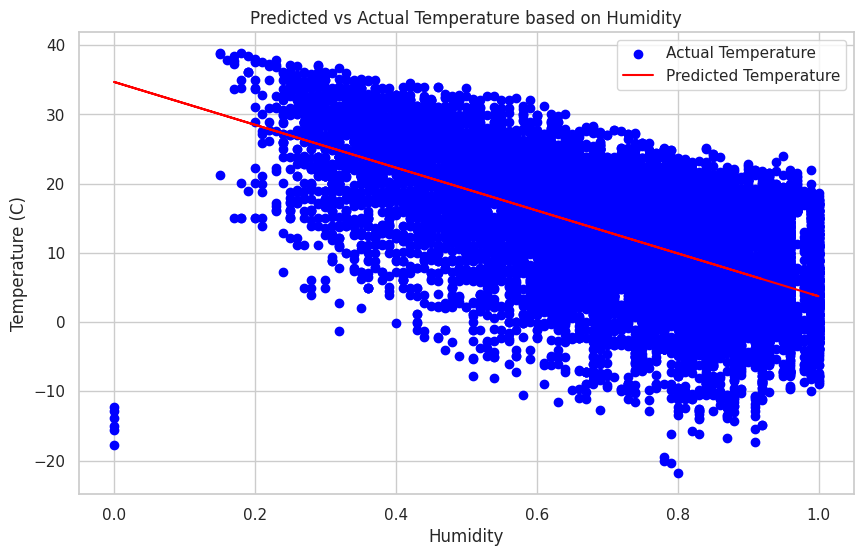

In [18]:
# Define features (Humidity) and target (Temperature)
X = data_cleaned.drop(['Temperature (C)', 'Formatted Date'], axis=1)
y = data_cleaned['Temperature (C)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression using Humidity
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train['Humidity'], y_train)

# Predict on test data
y_pred = slope * X_test['Humidity'] + intercept

# Plot Prediction vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Humidity'], y_test, color='blue', label='Actual Temperature')
plt.plot(X_test['Humidity'], y_pred, color='red', label='Predicted Temperature')
plt.title('Predicted vs Actual Temperature based on Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()


Step 6: Model Accuracy (Simple Model)

In [19]:
# Calculate Accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 6.009864206843095
R² Score: 0.39675413608596


Step 7: Multiple Linear Regression using scikit-learn

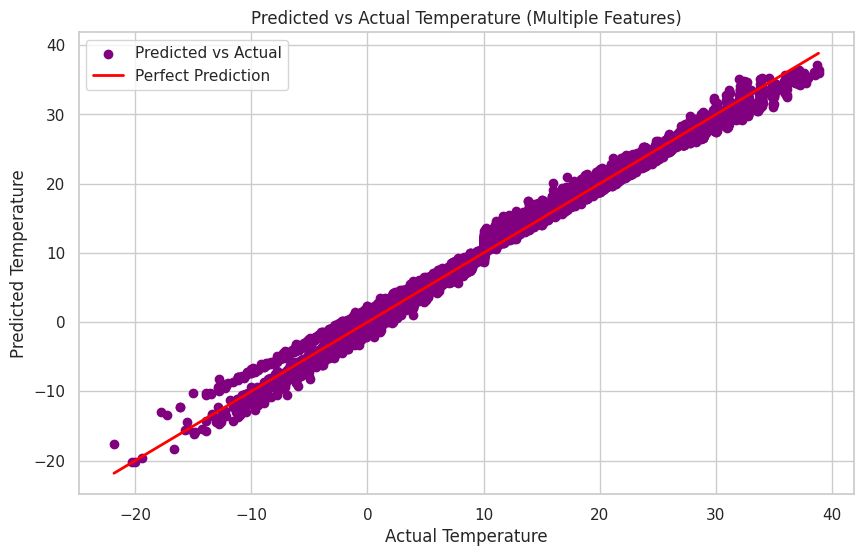

In [20]:
from sklearn.linear_model import LinearRegression

# Train a model with all features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict with multiple features
y_pred_multi = model.predict(X_test)

# Plot Predicted vs Actual (Multiple Features)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, color='purple', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.title('Predicted vs Actual Temperature (Multiple Features)')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()


Step 8: Model Accuracy (Multiple Features)

In [21]:
# Calculate Accuracy for Multiple Features
mae_multi = mean_absolute_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Mean Absolute Error (MAE) with multiple features: {mae_multi}")
print(f"R² Score with multiple features: {r2_multi}")


Mean Absolute Error (MAE) with multiple features: 0.7360615583168749
R² Score with multiple features: 0.9903109280367529
